#NO need to MOVEIT; however its advisable to move the neck 

## Setup

必要なライブラリをインポートして、初期化を行います。

Import the required libraries and initialize them:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ros_numpy
import rospy
import tf
from gazebo_ros import gazebo_interface
from sensor_msgs.msg import LaserScan, PointCloud2
from geometry_msgs.msg import Pose, Quaternion
import sys
import time

from utils_notebooks import *
import cv2
import os




In [3]:
import moveit_commander
import moveit_msgs.msg
head = moveit_commander.MoveGroupCommander('head')

In [4]:


## THIS PATH MUST BE SET BY USER () 


#_path_model = "/home/oscar/Codes/ycb_ws/src/robot_object_views/robotobject/models"   Tenshi Version


_path_model = "/home/oscar/Codes/catkin_mio_ws/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 


objs=os.listdir(_path_model)
print (objs)

['ycb_021_bleach_cleanser', 'ycb_065-e_cups', 'wrc_bin_black', 'ycb_057_racquetball', 'wrc_tray', 'ycb_043_phillips_screwdriver', 'wrc_bin_green', 'ycb_073-b_lego_duplo', 'ycb_009_gelatin_box', 'ycb_072-e_toy_airplane', 'ycb_004_sugar_box', 'ycb_073-d_lego_duplo', 'ycb_061_foam_brick', 'ycb_016_pear', 'ycb_065-a_cups', 'wrc_ground_plane', 'wrc_bookshelf', 'ycb_072-b_toy_airplane', 'trofast', 'ycb_026_sponge', 'ycb_012_strawberry', 'ycb_013_apple', 'ycb_051_large_clamp', 'ycb_022_windex_bottle', 'ycb_065-h_cups', 'ycb_025_mug', 'ycb_036_wood_block', 'ycb_056_tennis_ball', 'ycb_044_flat_screwdriver', 'ycb_031_spoon', 'ycb_072-c_toy_airplane', 'wrc_frame', 'ycb_010_potted_meat_can', 'ycb_073-f_lego_duplo', 'ycb_072-d_toy_airplane', 'ycb_053_mini_soccer_ball', 'ycb_033_spatula', 'ycb_040_large_marker', 'ycb_027_skillet', 'ycb_052_extra_large_clamp', 'wrc_container_b', 'ycb_073-a_lego_duplo', 'ycb_070-a_colored_wood_blocks', 'wrc_stair_like_drawer', 'ycb_032_knife', 'wrc_long_table', 'ycb_0

In [5]:
#AGAIN THIS PATH MUST BE SET ( IT IS LOCATED IN NOTEBOOK UTILS FILE utils_notebooks.py)

rvizを起動します．ロボットモデル、カメラ映像、ポイントクラウドが表示されています。

In [6]:
#Initialize  Ros Node
rospy.init_node("recognition")


In [7]:
#create a RGBD() object to read xtion
rgbd = RGBD()

In [8]:
#Create a tf listener to read tf tree ( shockingly)
listener = tf.TransformListener()
rospy.sleep(.5)

Launch RViz. The robot model, camera image, and point cloud are displayed:

In [9]:
#Get pose of the xtion w.r.t map frame 
#( odom , or hsrb base vfootprint might obe other 
#useful reference frames)


trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)
#trans,np.rad2deg(tf.transformations.euler_from_quaternion(rot))
trans, euler

([-0.061530962350431866, 0.020313669909870342, 0.9920976799292504],
 (-4.8965276299110006e-12, -0.0009139727447711932, -0.03467926063999996))

In [10]:
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))

#trans,np.rad2deg(tf.transformations.euler_from_quaternion(rot))

In [10]:
#trans , rot = listener.lookupTransform('/map', '/base_footprint', rospy.Time(0))
#trans,np.rad2deg(tf.transformations.euler_from_quaternion(rot))

In [11]:
def gazebo_2_world(x,y):

    x_world= x+2.1
    y_world= -(y-1.2)
    return (x_world,y_world)

def world_2_gazebo(y_world , x_world):

    x= ( x_world - 2.1)
    y= (-y_world + 1.2) 
    return (x , y)

In [15]:
#Get pose of the xtion w.r.t map frame 

trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler

([-0.12991106909790306, 0.022640699105131785, 0.9516797395121364],
 (-4.896527277193815e-12, -0.3505635119359863, -0.03175601277433088))

In [34]:
#USE TRANSFORM TREE TF TO SPAWN A STATIC MODEL
# D_to_cam  METERS AWAY FROM XTION ON THE dIRECTION OF IT FOCAL POINT


#x_gaz,y_gaz=world_2_gazebo(1.15,0.02)
deg=0

model_name= objs[-2]   #Rubik 

#spawn_object("lego1", model_name, x_gaz,  y_gaz, .11, 0)
D_to_cam= 0.2
x_gaz,y_gaz=world_2_gazebo(0.025+trans[0]+ D_to_cam * np.cos(euler[2]), 0.01+ trans[1]+ D_to_cam * np.sin(euler[2]))
spawn_object(model_name, model_name, x_gaz,  y_gaz,  trans[2]- D_to_cam*np.sin(euler[1]), deg)


[INFO] [1616630726.321256, 964.678000]: Spawn: ycb_073-c_lego_duplo
[INFO] [1616630726.329943, 964.678000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616630726.335995, 964.678000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616630726.354919, 964.680000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616630726.703546, 964.711000]: Spawn status: SpawnModel: Successfully spawned entity


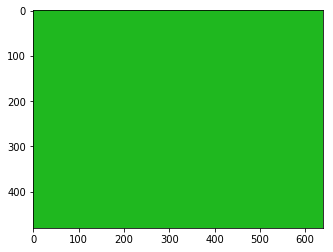

In [35]:
#GET AND SHOW IMAGE
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)


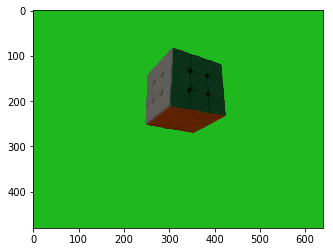

In [18]:
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)


In [19]:
delete_object("rubik")


In [32]:
#moveit
#MOVE IT MUST BE RUNNING. DECLARE A HEAD POSE
head_val=head.get_current_joint_values()
head_val[0]=np.deg2rad(0)
head_val[1]=np.deg2rad(20)
#WATCH OUT FOR JOINTS LIMITS (exorcist joke)

In [33]:
#plan and execute target pose
head.set_joint_value_target(head_val)
head.go()

True

レゴブロックが頭部カメラの画角に入るように頭を少し下げます。rviz上の頭部カメラの映像が変化することを確認しましょう。

Lower the head slightly so that the Lego block is within the viewing angle of the head camera. Check that the image in the head camera in RViz changes accordingly:

In [29]:
#Capture a frame each degdree while changing static object pose
#I dont love this way of spawining and  deleting, 
#CONTROL VIA ROS TOPIC POSE !
start = time.time()


for j in range (100):


    deg= np.deg2rad(i)
    print(i)
    #spawn_object("lego2", model_name, x_gaz,  y_gaz, trans[2], 0.8)
    spawn_object("rubik", model_name, x_gaz,  y_gaz, trans[2]- D_to_cam* np.sin(euler[1]) , 2*np.pi*np.random.rand() ,2*np.pi*np.random.rand(),2*np.pi*np.random.rand())
    cap_cnt= j
    rospy.sleep(.1)
    cv2_img = rgbd.get_image()

    cap_name = "/home/oscar/Codes/roscodes/scripts_ros/imagesfromlistener/rubik_{}.png".format(cap_cnt)   ##SAVE YOUR IMAGES WHEREVER YOU WAnt
    #cap_name = "imagesfromlistener/image_from_listener_{}.png".format(cap_cnt)
    cv2.imwrite(cap_name, cv2_img)
    delete_object("rubik")

print( 'time elapsed in training video',(end - start))
    

4
[INFO] [1616628529.846927, 790.739000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628529.859640, 790.739000]: Spawn: [ 0.09948129  0.23206673 -0.64145079  0.72442349]
[INFO] [1616628529.864700, 790.750000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628529.880296, 790.760000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628529.904149, 790.767000]: Spawn status: SpawnModel: Failure - entity already exists.
4
[INFO] [1616628533.252041, 791.165000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628533.255419, 791.165000]: Spawn: [ 0.2318696   0.88495187 -0.39642054  0.07711961]
[INFO] [1616628533.262170, 791.165000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628533.287709, 791.165000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628533.512689, 791.181000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628536.242361, 791.408000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628536.244664, 791.408000]: Spawn: [ 0.49836408 -0.72352683  0.429

[INFO] [1616628592.884203, 795.988000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628595.608042, 796.222000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628595.610442, 796.222000]: Spawn: [-0.53679542 -0.45913732 -0.53878149  0.45908398]
[INFO] [1616628595.613983, 796.223000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628595.621773, 796.223000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628595.916154, 796.234000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628599.575513, 796.521000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628599.578526, 796.522000]: Spawn: [ 0.19171689  0.60851601 -0.23010742  0.73484929]
[INFO] [1616628599.581521, 796.522000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628599.588782, 796.522000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628599.769886, 796.532000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628602.402944, 796.750000]: Spawn: ycb_077_r

[INFO] [1616628663.375987, 801.453000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628666.838931, 801.706000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628666.840970, 801.706000]: Spawn: [ 0.43090297 -0.16712891 -0.3866579  -0.79805152]
[INFO] [1616628666.842188, 801.706000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628666.851205, 801.707000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628667.193156, 801.716000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628670.529322, 801.940000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628670.531600, 801.940000]: Spawn: [ 0.65398744 -0.27756182  0.6380354   0.29693551]
[INFO] [1616628670.532690, 801.940000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628670.540697, 801.941000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628670.638889, 801.944000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628673.274124, 802.180000]: Spawn: ycb_077_r

[INFO] [1616628728.131566, 806.776000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628731.317327, 807.011000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628731.320260, 807.012000]: Spawn: [0.20882716 0.51606844 0.26215892 0.78824951]
[INFO] [1616628731.321748, 807.012000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628731.377573, 807.015000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628731.571222, 807.029000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628734.999180, 807.270000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628735.003123, 807.271000]: Spawn: [-0.89169329  0.05213029  0.40658958  0.19196466]
[INFO] [1616628735.004311, 807.271000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628735.011478, 807.272000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628735.242438, 807.282000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628738.637273, 807.492000]: Spawn: ycb_077_rubik

4
[INFO] [1616628802.780088, 812.306000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628802.782181, 812.306000]: Spawn: [-0.62797806  0.14933112  0.73599434 -0.20409829]
[INFO] [1616628802.783244, 812.306000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628802.799512, 812.307000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628802.989428, 812.311000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628805.931772, 812.534000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628805.933651, 812.534000]: Spawn: [ 0.27468912  0.78011981 -0.31636004  0.46462382]
[INFO] [1616628805.935201, 812.534000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628805.961161, 812.537000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628806.174899, 812.548000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628809.749048, 812.857000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628809.750873, 812.857000]: Spawn: [ 0.99246029  0.10151006 -0.04528675

[INFO] [1616628865.049551, 817.353000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628867.803530, 817.580000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628867.805833, 817.580000]: Spawn: [-0.26975988  0.76096022  0.11067711  0.57958583]
[INFO] [1616628867.807191, 817.580000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628867.814645, 817.581000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628868.074439, 817.597000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628870.954076, 817.812000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628870.956420, 817.812000]: Spawn: [ 0.36821049 -0.89730489 -0.0379375   0.24046979]
[INFO] [1616628870.959191, 817.812000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628870.971192, 817.814000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628871.244897, 817.837000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628874.228237, 818.081000]: Spawn: ycb_077_r

[INFO] [1616628932.647295, 822.483000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628935.405200, 822.728000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628935.407531, 822.728000]: Spawn: [-0.91336951  0.17699652  0.2840143  -0.23187117]
[INFO] [1616628935.408770, 822.728000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628935.422097, 822.729000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628935.663794, 822.740000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628938.405894, 822.970000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616628938.408358, 822.970000]: Spawn: [ 0.20257003  0.4274154  -0.87313781  0.11794837]
[INFO] [1616628938.410194, 822.970000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616628938.441184, 822.971000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616628938.672779, 822.984000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616628941.635612, 823.221000]: Spawn: ycb_077_r

[INFO] [1616628997.234499, 827.694000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629000.472650, 827.948000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629000.474805, 827.948000]: Spawn: [ 0.46372126 -0.54201703 -0.02345137  0.70044997]
[INFO] [1616629000.476530, 827.948000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629000.521611, 827.952000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629000.654203, 827.957000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629003.990727, 828.188000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629003.998787, 828.189000]: Spawn: [ 0.7267348  -0.37559144  0.57140441  0.06545677]
[INFO] [1616629004.001437, 828.189000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629004.035845, 828.190000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629004.305555, 828.203000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629007.493363, 828.455000]: Spawn: ycb_077_r

[INFO] [1616629064.403960, 832.842000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629067.727318, 833.108000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629067.729584, 833.108000]: Spawn: [ 0.56427025  0.48947845 -0.39136825  0.53743914]
[INFO] [1616629067.731907, 833.109000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629067.757749, 833.112000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629067.967204, 833.124000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629071.170161, 833.374000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629071.172739, 833.374000]: Spawn: [ 0.35442779  0.60329345 -0.38022723  0.6048514 ]
[INFO] [1616629071.173935, 833.374000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629071.185332, 833.374000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629071.367552, 833.385000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629074.491745, 833.638000]: Spawn: ycb_077_r

[INFO] [1616629127.904887, 838.169000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629131.244315, 838.433000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629131.246442, 838.433000]: Spawn: [-0.41451346  0.58303082  0.42092507  0.55774165]
[INFO] [1616629131.247342, 838.433000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629131.258957, 838.434000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629131.505138, 838.446000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629134.644536, 838.699000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629134.648719, 838.700000]: Spawn: [-0.67481408 -0.60077034 -0.03345256  0.42729601]
[INFO] [1616629134.649887, 838.700000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629134.666147, 838.701000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629134.945949, 838.713000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629137.837377, 838.957000]: Spawn: ycb_077_r

4
[INFO] [1616629195.429508, 843.713000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629195.431374, 843.713000]: Spawn: [-0.30471559 -0.88692023  0.14505294  0.3154054 ]
[INFO] [1616629195.432496, 843.713000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629195.441502, 843.714000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629195.666760, 843.725000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629198.606893, 843.964000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629198.608857, 843.964000]: Spawn: [ 0.621813   -0.00172183  0.78245214  0.03338085]
[INFO] [1616629198.610178, 843.964000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629198.622976, 843.965000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629198.876933, 843.981000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629201.868174, 844.215000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629201.870606, 844.215000]: Spawn: [-0.05343362 -0.64759984  0.0750502 

[INFO] [1616629255.851561, 848.622000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629258.987343, 848.871000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629258.989880, 848.871000]: Spawn: [ 0.42694576 -0.55848599 -0.58685208 -0.40176529]
[INFO] [1616629258.992430, 848.872000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629259.004671, 848.873000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629259.223348, 848.885000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629262.328183, 849.166000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629262.332298, 849.167000]: Spawn: [-0.19493001  0.75103308 -0.07116888  0.62680666]
[INFO] [1616629262.333625, 849.167000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629262.350199, 849.169000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629262.595891, 849.184000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629265.690269, 849.462000]: Spawn: ycb_077_r

[INFO] [1616629318.853384, 853.757000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629321.344762, 853.943000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629321.346694, 853.943000]: Spawn: [-0.61491836  0.51122642  0.59740998  0.06020196]
[INFO] [1616629321.350175, 853.943000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629321.359916, 853.943000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629321.653118, 853.956000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629324.554103, 854.188000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629324.565690, 854.188000]: Spawn: [ 0.50231066  0.18076574 -0.80693543  0.25271121]
[INFO] [1616629324.568538, 854.188000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629324.582741, 854.188000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629324.923135, 854.205000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629328.136672, 854.467000]: Spawn: ycb_077_r

[INFO] [1616629384.132577, 858.909000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629387.312326, 859.184000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629387.314649, 859.184000]: Spawn: [-0.72160977  0.02312751  0.69188978  0.00574441]
[INFO] [1616629387.316744, 859.184000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629387.334460, 859.186000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629387.584900, 859.198000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629390.271402, 859.422000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629390.276464, 859.423000]: Spawn: [ 0.38631078  0.74294419 -0.20173051  0.5080381 ]
[INFO] [1616629390.278224, 859.423000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629390.284250, 859.423000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629390.337541, 859.424000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629392.875250, 859.640000]: Spawn: ycb_077_r

[INFO] [1616629451.130499, 863.971000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629454.541912, 864.190000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629454.569015, 864.190000]: Spawn: [ 0.19542643  0.53273859 -0.0602485   0.82119926]
[INFO] [1616629454.570123, 864.190000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629454.583605, 864.192000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629454.818483, 864.201000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629458.377978, 864.475000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629458.380472, 864.475000]: Spawn: [-0.5490971   0.22790257  0.78541903  0.17224908]
[INFO] [1616629458.408278, 864.475000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629458.439226, 864.478000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629458.697165, 864.490000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629462.195093, 864.699000]: Spawn: ycb_077_r

4
[INFO] [1616629522.343716, 869.103000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629522.345875, 869.103000]: Spawn: [-0.855576    0.32778976 -0.38925016  0.09501521]
[INFO] [1616629522.347197, 869.103000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629522.361908, 869.105000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629522.611113, 869.118000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629525.618638, 869.358000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629525.622130, 869.358000]: Spawn: [ 0.01028583  0.15590929 -0.57182416  0.80535932]
[INFO] [1616629525.623525, 869.358000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629525.640847, 869.360000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629525.866678, 869.368000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629529.250414, 869.619000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629529.252606, 869.619000]: Spawn: [-0.02563365 -0.73742187 -0.66445021

[INFO] [1616629591.710052, 874.118000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629594.390516, 874.298000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629594.393406, 874.298000]: Spawn: [-0.17239489  0.42921725 -0.12931605  0.87711454]
[INFO] [1616629594.394859, 874.298000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629594.405331, 874.299000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629594.525099, 874.300000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629597.689009, 874.505000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629597.692757, 874.506000]: Spawn: [ 0.34664026  0.82348274  0.37863217 -0.24156653]
[INFO] [1616629597.694016, 874.506000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629597.702418, 874.506000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629597.977807, 874.521000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629601.283038, 874.782000]: Spawn: ycb_077_r

[INFO] [1616629659.079537, 878.979000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629662.385717, 879.214000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629662.388065, 879.214000]: Spawn: [ 0.70452539 -0.30559326  0.03911688  0.63931729]
[INFO] [1616629662.390777, 879.215000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629662.404994, 879.215000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629662.645446, 879.233000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629665.766260, 879.454000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629665.768192, 879.454000]: Spawn: [0.53546716 0.47124215 0.69040446 0.12061276]
[INFO] [1616629665.770224, 879.454000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629665.773916, 879.454000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629666.043320, 879.491000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629669.278050, 879.744000]: Spawn: ycb_077_rubik

[INFO] [1616629726.573302, 883.915000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629730.291677, 884.160000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629730.295134, 884.161000]: Spawn: [-0.36784642  0.49872371 -0.45642747 -0.63846506]
[INFO] [1616629730.296929, 884.162000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629730.321980, 884.165000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629730.452378, 884.168000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629734.725953, 884.420000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629734.728126, 884.420000]: Spawn: [ 0.58666289  0.07783251 -0.27953227 -0.75606247]
[INFO] [1616629734.731140, 884.421000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629734.744264, 884.421000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629734.922680, 884.433000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629738.036582, 884.681000]: Spawn: ycb_077_r

[INFO] [1616629794.975166, 889.222000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629797.847892, 889.463000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629797.851197, 889.463000]: Spawn: [-0.19264622  0.5708152  -0.3909047   0.69588142]
[INFO] [1616629797.853751, 889.463000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629797.865184, 889.464000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629798.001314, 889.466000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629801.633363, 889.739000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629801.639616, 889.739000]: Spawn: [-0.97342044 -0.04426214  0.19396952  0.1134431 ]
[INFO] [1616629801.645083, 889.739000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629801.676189, 889.742000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629801.881182, 889.752000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629804.699161, 889.961000]: Spawn: ycb_077_r

4
[INFO] [1616629867.092093, 894.381000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629867.094775, 894.381000]: Spawn: [-0.33814851  0.10648812  0.47351934 -0.80628487]
[INFO] [1616629867.096588, 894.381000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629867.113387, 894.382000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629867.531060, 894.409000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629871.020281, 894.643000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629871.022581, 894.643000]: Spawn: [-0.08951578 -0.70866013 -0.12320446  0.68891829]
[INFO] [1616629871.026143, 894.644000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629871.042385, 894.644000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629871.556327, 894.660000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629875.637747, 894.909000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629875.639654, 894.909000]: Spawn: [-0.05815344  0.28727574  0.21293682

[INFO] [1616629935.256075, 899.184000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629939.005639, 899.414000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629939.014476, 899.414000]: Spawn: [-0.52647416 -0.59634296  0.42781739 -0.42915302]
[INFO] [1616629939.017319, 899.414000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629939.052262, 899.416000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629939.303997, 899.432000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629942.787252, 899.677000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616629942.790883, 899.677000]: Spawn: [-0.13286697  0.66682757 -0.1551222   0.71667599]
[INFO] [1616629942.793327, 899.677000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616629942.805447, 899.678000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616629943.116757, 899.698000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616629946.076630, 899.920000]: Spawn: ycb_077_r

[INFO] [1616630002.791414, 904.101000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616630006.523737, 904.377000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616630006.528540, 904.378000]: Spawn: [ 0.0365417  -0.09573975 -0.32249431  0.94100798]
[INFO] [1616630006.530208, 904.378000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616630006.536496, 904.379000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616630006.656830, 904.390000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616630009.782125, 904.616000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616630009.785592, 904.616000]: Spawn: [-0.55280016 -0.59619125 -0.48691944  0.31918245]
[INFO] [1616630009.787569, 904.616000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616630009.818795, 904.619000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616630010.028712, 904.641000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616630012.723326, 904.842000]: Spawn: ycb_077_r

[INFO] [1616630077.076354, 909.215000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616630080.980852, 909.447000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616630080.984131, 909.447000]: Spawn: [-0.13506149  0.46695878 -0.37748679  0.78816979]
[INFO] [1616630080.994120, 909.447000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616630081.008779, 909.449000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616630081.182825, 909.457000]: Spawn status: SpawnModel: Successfully spawned entity
4
[INFO] [1616630084.435476, 909.691000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616630084.438185, 909.691000]: Spawn: [-0.22057001  0.53504342 -0.00619299  0.81549927]
[INFO] [1616630084.441368, 909.691000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616630084.452562, 909.692000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616630084.689317, 909.698000]: Spawn status: SpawnModel: Successfully spawned entity


KeyboardInterrupt: 

0.5736791263304507

In [ ]:
#TO MAKE MR EDD HAPPY MAKE A VIDEO OUT OF THIS FRAMES
#on terminal go to folder containing the images and run
# $ffmpeg -framerate 30  -pattern_type glob -i '*.png' -r 5 video.mp4
# It is advisable to name each video other than video.mp4

In [41]:
x_gaz,y_gaz=2.66,-1.0

spawn_object("lego1", model_name, x_gaz,  y_gaz, 0.81, 0)
spawn_object("lego2", model_name, x_gaz,  y_gaz+.20, 0.81, 0)


[INFO] [1616171839.121837, 619.732000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616171839.129753, 619.735000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616171839.133454, 619.735000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616171839.152859, 619.738000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616171839.400309, 619.757000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1616171839.402064, 619.757000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616171839.404728, 619.757000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616171839.406307, 619.757000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616171839.423869, 619.758000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616171839.666958, 619.777000]: Spawn status: SpawnModel: Successfully spawned entity


In [30]:
delete_object("lego1")
delete_object("lego2")
delete_object("lego3")

In [25]:
low= np.array([0,100,0])
high= np.array([100,200,100])
mask = cv2.inRange(cv2_img, low, high)
mask_buena= cv2.morphologyEx(mask,cv2.MORPH_ERODE,np.ones((9,9),np.uint8))
masked_image = np.copy(img)
masked_image[mask_buena != 0] = [0, 0, 0]

#
### FIND OBJECTS ( CONTOURS FINDING IN MASKED IMAGE)

ret,thresh = cv2.threshold(mask_buena,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=find_2nd_biggest_contour_ix(contours)
boundRect = cv2.boundingRect(contours[find_2nd_biggest_contour_ix(contours)])#contours_poly[i])
cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color, 2)
x,y,w,h =boundRect
print (w,h)
if (w < h):


    x=(int)(x-.5*(h-w))
    w=h
    boundRect=x,y,w,h
    cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color2, 2)
if (h < w):


    y=(int)(x-.5*(w-h))
    h=w
    boundRect=x,y,w,h
    cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color2, 2)

img_roi=img[y:y+h,x:x+w,:]
#img_resized=cv2.resize(img_roi,(img_width,img_height))



cv2.imshow('frame', img)
if cv2.waitKey(1) == ord('q'):
    break